# 4 layer Neural Network Using Keras: 
3 layer neural network has been created for mnist dataset.
The initial layer is 784 neurons which is our input, first hidden layer  with 128 neurons with relu activation function and 20 percent dropout, second hidden layer with 64 neurons with tanh activation function and dropout of 40 percent, final output layer is 10 neuron with softmax activation since we are to predict 1 digit out of 10.

 I have used-
1. batch size of 100.
2. ReduceLROnPlateau to specify learning rate decay
3. Data augmenttaion has been done using Image Data Generator
4. Epochs=25

 





Visualization Plots
1. Confusion matrix has been plotted 
2. Plot for training and test accuracy
3. Plot for training and test loss
4. Common Errors have been predicted and plotted.

In [110]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential # sequential layers
from keras.layers import Dense, Dropout, Flatten, Activation # core layers

from keras.preprocessing.image import ImageDataGenerator # preprocessing 

from keras.utils.np_utils import to_categorical 
from keras.utils import np_utils # to convert to one hot labels
from keras.datasets import mnist #load mnist dataset
import itertools

In [111]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # loading the mnist dataset
x_train=x_train/255 # normalizing the x_train and x_test dataset
x_test=x_test/255
#Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.reshape(-1,28,28,1) # inorder to preprocess the data, reshaping into rank 4 matrix 

In [112]:
# Data Augmentation using Image Data Generator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train, augment=True) # fitting the model


In [113]:
x_train=x_train.reshape(len(x_train),784) # reshaping training data back to fit the model
x_test=x_test.reshape(len(x_test),28*28)# reshaping test data back to fit the model 
labels = np_utils.to_categorical(y_train) # converting labels into to one hot vectors (eg : 4 -> [0,0,0,1,0,0,0,0,0,0])
y_test = np_utils.to_categorical(y_test) 

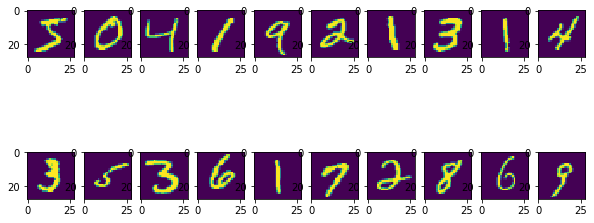

In [114]:
%matplotlib inline
# preview the images first
plt.figure(figsize=(10,10))
x, y = 10, 4
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [115]:
#Using Keras Sequential to build NN, first hidden layer used relu activation function with 128 neurons and second hiddden used tanh function with 64 neurons.
# 20 percent neuron were dropped in first hidden layer and 40 percent were dropped in second layer
model=Sequential()
model.add(Dense(128, input_shape=(784,))) # first hidden layer
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('tanh'))# second hidden layer
model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax')) # softmax function at output layer

In [116]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # model compilation and specifying optimizer and metrics

In [117]:
#Using ReduceLROnPlateau to specify learning rate decay, 
from keras.callbacks import ReduceLROnPlateau
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, # i choose to reduce the LR by half if the accuracy is not improved after 2 epochs.
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [118]:
#fit the model
mnist_model = model.fit(x_train, labels,
          batch_size=100, epochs=25,
          verbose=2,
          validation_data=(x_test, y_test),callbacks=[learning_rate_reduction])

Epoch 1/25
600/600 - 3s - loss: 0.4059 - accuracy: 0.8817 - val_loss: 0.1611 - val_accuracy: 0.9494
Epoch 2/25
600/600 - 2s - loss: 0.1828 - accuracy: 0.9466 - val_loss: 0.1124 - val_accuracy: 0.9659
Epoch 3/25
600/600 - 2s - loss: 0.1352 - accuracy: 0.9609 - val_loss: 0.1002 - val_accuracy: 0.9697
Epoch 4/25
600/600 - 2s - loss: 0.1119 - accuracy: 0.9674 - val_loss: 0.0877 - val_accuracy: 0.9755
Epoch 5/25
600/600 - 2s - loss: 0.1001 - accuracy: 0.9703 - val_loss: 0.0774 - val_accuracy: 0.9768
Epoch 6/25
600/600 - 2s - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.0816 - val_accuracy: 0.9762
Epoch 7/25
600/600 - 2s - loss: 0.0799 - accuracy: 0.9756 - val_loss: 0.0782 - val_accuracy: 0.9773
Epoch 8/25
600/600 - 2s - loss: 0.0738 - accuracy: 0.9769 - val_loss: 0.0752 - val_accuracy: 0.9784
Epoch 9/25
600/600 - 2s - loss: 0.0697 - accuracy: 0.9780 - val_loss: 0.0759 - val_accuracy: 0.9779
Epoch 10/25
600/600 - 2s - loss: 0.0651 - accuracy: 0.9797 - val_loss: 0.0776 - val_accuracy: 0.9777

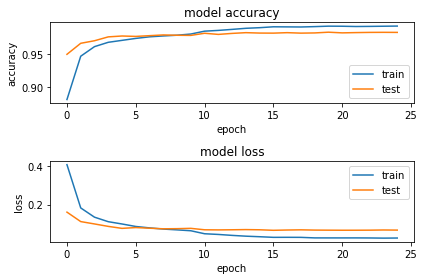

In [122]:
# plotting the accuracy and loss for training and test data
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(mnist_model.history['accuracy'])
plt.plot(mnist_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(mnist_model.history['loss'])
plt.plot(mnist_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


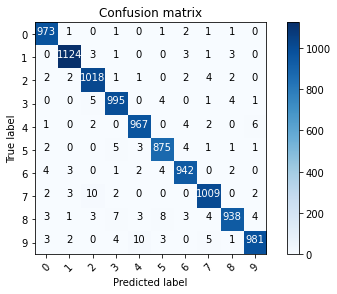

In [123]:
#plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Function to print and plot the confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_class = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
conf_mtx = confusion_matrix(Y_true, Y_pred_class) 
# plot the confusion matrix
plot_confusion_matrix(conf_mtx, classes = range(10))

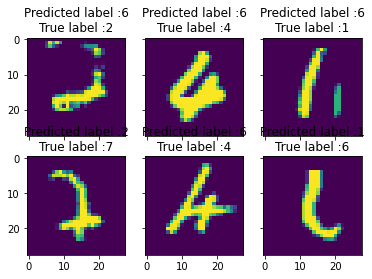

In [124]:
# Finding most common errors
# Errors are difference between predicted labels and true labels
err= (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[err]
Y_pred_errors = Y_pred[err]
Y_true_errors = Y_true[err]
X_val_errors = x_test[err]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Prob_Y_pred_errors = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
prob_true_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Prob_Y_pred_errors - prob_true_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_imp_errors = sorted_delta_errors[-6:]

# Show the top 6 errors
display_errors(most_imp_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)